In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image


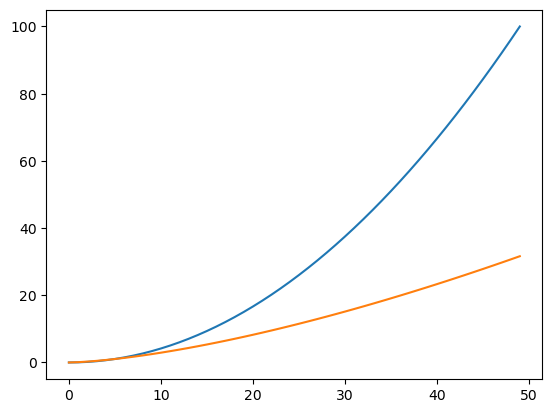

In [2]:
x = np.linspace(0, 10)
plt.plot(x**2)
plt.plot(x**(1.5))

In [3]:
imgs = []
for i in range(8):
    
    imgs.append(np.asarray(Image.open(f'{i}.png')))

In [67]:
total_frames = 45

list_imgs_0 = []
list_imgs_1 = []
list_imgs_2 = []

power = 1.2
slow_start = 33
for i in range(total_frames):
    if i < slow_start:
        list_imgs_0.append(i%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_0.append(i%8)


start_slow_1 = int(3*len(list_imgs_0) / 4)

for i in range(start_slow_1):
    list_imgs_1.append((i+1)%8)
    list_imgs_2.append((i+3)%8)
    list_imgs_0.append(list_imgs_0[-1])


for i in range(total_frames):
    if i < slow_start:
        list_imgs_1.append((i+1)%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_1.append((i+1)%8)

start_slow_2 = int(1*len(list_imgs_1) / 2)

for i in range(start_slow_2):
    list_imgs_2.append((i+3)%8)
    list_imgs_1.append(list_imgs_1[-1])
    list_imgs_0.append(list_imgs_0[-1])

for i in range(total_frames):
    if i < slow_start:
        list_imgs_2.append((i+3)%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_2.append((i+3)%8)

total_frames = len(list_imgs_2)


In [68]:
total_frames

327

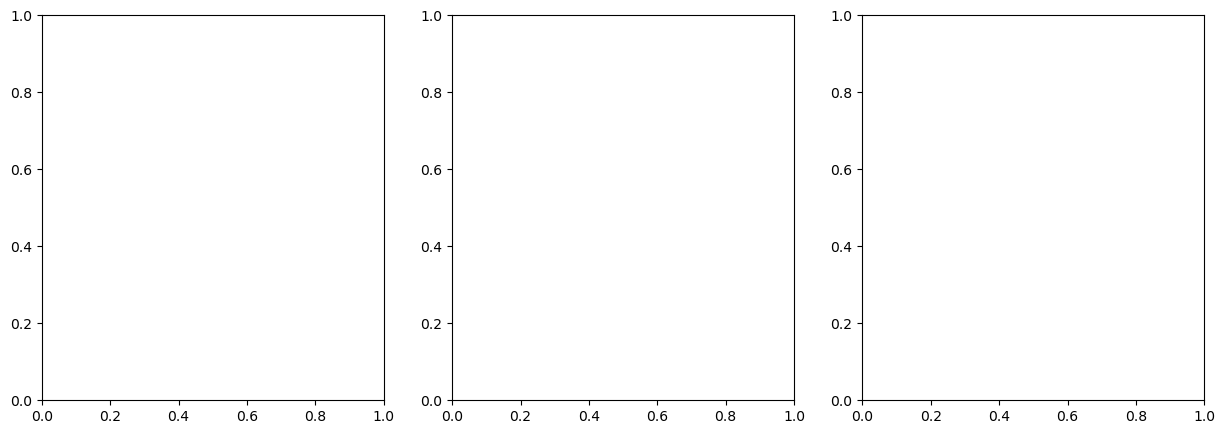

In [69]:

# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Function to initialize the plot
def init():
    ax[0].clear()

    return []

# Function to update the plot for each frame
def update(frame):
#     print(frame+1%8)
    ax[0].clear()
    # Your plotting code here
    ax[0].imshow(imgs[list_imgs_0[frame]])
    
    ax[1].clear()
    # Your plotting code here
    ax[1].imshow(imgs[list_imgs_1[frame]])
    
    ax[2].clear()
    # Your plotting code here
    ax[2].imshow(imgs[list_imgs_2[frame]])
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# Create the animation
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, repeat=False, interval=50)


In [70]:
ani.save('test_roulette.mp4')#, dpi=5)